# Visualize the latent rep of various tumor types to see if you can use the LR as a diagnostic tool

A tool for visualizing gene expression profile.

- is not biased to a disease, it is like xray
- reduces dimensions while retaining information and improving dimensions.
- features are sparse but highly indicative of disease situations.
- subtypes and variations and immediately seen!
- disparate types could show similar activation so could respond to same therapy
- oncologists could read out diseases easily
- based on gene mechanisms not symptoms.

In [1]:
import os
import pandas as pd


!apt-get install graphviz
!pip install pydot graphviz

import pydot
pydot.Dot.create(pydot.Dot())

from IPython.display import SVG
from graphviz import Source
from IPython.display import display


Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fontconfig libann0 libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgts-0.7-5 libgts-bin libgvc6 libgvpr2 libjbig0 liblab-gamut1 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
Suggested packages:
  gsfonts graphviz-doc libgd-tools
The following NEW packages will be installed:
  fontconfig graphviz libann0 libcairo2 libcdt5 libcgraph6 libdatrie1 libgd3
  libgts-0.7-5 libgts-bin libgvc6 libgvpr2 libjbig0 liblab-gamut1 libltdl7
  libpango-1.0-0 libpangocairo-1.0-0 libpangoft2-1.0-0 libpathplan4
  libpixman-1-0 libthai-data libthai0 libtiff5 libwebp6 libxaw7 libxcb-render0
  libxcb-shm0 libxmu6 libxpm4 libxt6
0 upgraded, 30 newly installed, 0 to remove and 5 not upgraded.
Need to get 4,154 kB of

In [2]:
!pwd


/content


In [3]:
from google.colab import files

if os.path.exists('/content/tybalt/data/clinical_data.tsv'):
  data_exists=True
else:
  data_exists=False

if not data_exists:
  
  if not os.path.exists('/content/tybalt/data'):
    !mkdir -p tybalt/data

  os.chdir('/content/tybalt')
  uploaded = files.upload()

  for fn in uploaded.keys():
      print('User uploaded file "{name}" with length {length} bytes'.format(
          name=fn, length=len(uploaded[fn])))
    
  !mv *.tsv data/
  !ls data
else:
  os.chdir('/content/tybalt')
  
  

Saving clinical_data.tsv to clinical_data.tsv
User uploaded file "clinical_data.tsv" with length 1954970 bytes
clinical_data.tsv


In [4]:
  uploaded = files.upload()
  for fn in uploaded.keys():
      print('User uploaded file "{name}" with length {length} bytes'.format(
          name=fn, length=len(uploaded[fn])))
    
  !mv *.tsv data/

Saving encoded_rnaseq_onehidden_warmup_batchnorm_36dim.tsv to encoded_rnaseq_onehidden_warmup_batchnorm_36dim.tsv
User uploaded file "encoded_rnaseq_onehidden_warmup_batchnorm_36dim.tsv" with length 3198060 bytes


In [5]:
!ls data

clinical_data.tsv  encoded_rnaseq_onehidden_warmup_batchnorm_36dim.tsv


In [0]:
# Input files needed for this notebook
clinical_file = os.path.join('data', 'clinical_data.tsv')
activation_file = os.path.join('data', 'encoded_rnaseq_onehidden_warmup_batchnorm_36dim.tsv')

Load the activations of latent features for each patient tumor sample.

In [7]:
# load the activations of all tumors.
activations = pd.read_table(activation_file)

# create sample id from the tumor id
activations['sample_id']=activations.tcga_id.apply(lambda x:x[:12])
print(activations.shape)
activations.head(3)

(10459, 38)


,tcga_id,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,sample_id
0,TCGA-02-0047-01,0.0,0.000000,0.0,9.652770,0.0,4.159220,1.032724,1.333893,0.000000,...,4.095537,0.000000,0.0,0.248807,0.272327,3.184963,0.0,2.675518,0.000000,TCGA-02-0047
1,TCGA-02-0055-01,0.0,1.512052,0.0,4.649414,0.0,3.986379,1.551740,6.000260,0.000000,...,3.933533,0.000000,0.0,0.000000,0.299276,0.604121,0.0,0.000000,0.000000,TCGA-02-0055
2,TCGA-02-2483-01,0.0,3.843754,0.0,7.305416,0.0,6.712879,0.000000,3.738884,0.382847,...,6.744939,0.401072,0.0,1.256845,0.000000,3.929856,0.0,6.264098,0.502557,TCGA-02-2483


In [8]:
cases = pd.read_table(clinical_file)
diagnosis = cases[['sample_id', 'acronym', 'gender']]
diagnosis.head()

,sample_id,acronym,gender
0,TCGA-CD-8534,STAD,male
1,TCGA-ER-A19A,SKCM,male
2,TCGA-C5-A1M8,CESC,female
3,TCGA-D1-A0ZN,UCEC,female
4,TCGA-EM-A4FF,THCA,female


In [9]:
activations = pd.merge(activations, diagnosis, how='left')
activations.shape

(12175, 40)

In [10]:
activations.head()

,tcga_id,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,sample_id,acronym,gender
0,TCGA-02-0047-01,0.0,0.000000,0.000000,9.652770,0.0,4.159220,1.032724,1.333893,0.000000,...,0.000000,0.248807,0.272327,3.184963,0.000000,2.675518,0.000000,TCGA-02-0047,GBM,male
1,TCGA-02-0055-01,0.0,1.512052,0.000000,4.649414,0.0,3.986379,1.551740,6.000260,0.000000,...,0.000000,0.000000,0.299276,0.604121,0.000000,0.000000,0.000000,TCGA-02-0055,GBM,female
2,TCGA-02-2483-01,0.0,3.843754,0.000000,7.305416,0.0,6.712879,0.000000,3.738884,0.382847,...,0.000000,1.256845,0.000000,3.929856,0.000000,6.264098,0.502557,TCGA-02-2483,GBM,male
3,TCGA-02-2485-01,0.0,1.455699,0.000000,10.665386,0.0,5.645957,0.928695,1.088772,0.793327,...,0.000000,0.329535,0.000000,0.042516,0.241667,0.288800,1.574040,TCGA-02-2485,GBM,male
4,TCGA-02-2486-01,0.0,3.477089,0.759481,9.945347,0.0,7.444561,4.212522,0.000000,2.190329,...,0.695088,0.000000,2.402303,0.000000,0.114442,0.000000,0.513113,TCGA-02-2486,GBM,male


In [11]:
X = activations[[str(i) for i in range(1,37)]]
X.head()

,1,2,3,4,5,6,7,8,9,10,...,27,28,29,30,31,32,33,34,35,36
0,0.0,0.000000,0.000000,9.652770,0.0,4.159220,1.032724,1.333893,0.000000,0.000000,...,0.205776,4.095537,0.000000,0.000000,0.248807,0.272327,3.184963,0.000000,2.675518,0.000000
1,0.0,1.512052,0.000000,4.649414,0.0,3.986379,1.551740,6.000260,0.000000,0.535351,...,0.000000,3.933533,0.000000,0.000000,0.000000,0.299276,0.604121,0.000000,0.000000,0.000000
2,0.0,3.843754,0.000000,7.305416,0.0,6.712879,0.000000,3.738884,0.382847,0.000000,...,0.220688,6.744939,0.401072,0.000000,1.256845,0.000000,3.929856,0.000000,6.264098,0.502557
3,0.0,1.455699,0.000000,10.665386,0.0,5.645957,0.928695,1.088772,0.793327,0.000000,...,0.633842,8.387358,1.342886,0.000000,0.329535,0.000000,0.042516,0.241667,0.288800,1.574040
4,0.0,3.477089,0.759481,9.945347,0.0,7.444561,4.212522,0.000000,2.190329,0.000000,...,1.397643,2.803812,0.000000,0.695088,0.000000,2.402303,0.000000,0.114442,0.000000,0.513113


In [12]:
y1 = activations['acronym']
y1.head()

0    GBM
1    GBM
2    GBM
3    GBM
4    GBM
Name: acronym, dtype: object

How many of each are there?

In [13]:
y1.value_counts()

BRCA    1498
KIRC     762
LUAD     732
THCA     706
PRAD     668
LUSC     657
HNSC     638
LGG      564
LIHC     529
STAD     516
SKCM     481
BLCA     472
COAD     443
KIRP     389
OV       318
CESC     317
SARC     277
UCEC     225
ESCA     222
PCPG     205
PAAD     193
GBM      187
TGCT     168
KICH     141
THYM     126
READ     122
LAML     121
MESO      87
UVM       80
ACC       79
CHOL      63
UCS       57
DLBC      48
Name: acronym, dtype: int64

In [0]:
y_male=activations['gender']
y_male=pd.Series([1 if a=='male' else 0 for a in y_male])

In [15]:
y_male.value_counts()

0    6125
1    6050
dtype: int64

Here are disease names
acronym,organ
- ACC,Adrenal Gland
- BLCA,Bladder
- BRCA,Breast
- CESC,Cervix
- CHOL,Bile Duct
- COAD,Colorectal
- DLBC,Lymph Nodes
- ESCA,Esophagus
- GBM,Brain
- HNSC,Head and Neck
- KICH,Kidney
- KIRC,Kidney
- KIRP,Kidney
- LAML,Bone Marrow
- LGG,Brain
- LIHC,Liver
- LUAD,Lung
- LUSC,Lung
- MESO,Pleura
- OV,Ovary
- PAAD,Pancreas
- PCPG,Adrenal Gland
- PRAD,Prostate
- READ,Colorectal
- SARC,Soft Tissue
- SKCM,Skin
- STAD,Stomach
- TGCT,Testis
- THCA,Thyroid
- THYM,Thymus
- UCEC,Uterus
- UCS,Uterus
- UVM,Eye


In [0]:
tumor_types = 'ACC,BLCA,BRCA,CESC,CHOL,COAD,DLBC,ESCA,GBM,HNSC,KICH,KIRC,KIRP,LAML,LGG,LIHC,LUAD,LUSC,MESO,OV,PAAD,PCPG,PRAD,READ,SARC,SKCM,STAD,TGCT,THCA,THYM,UCEC,UCS,UVM'.split(',')

In [17]:
len(tumor_types)

33

## Reshape 36 to 6x6 to view

In [0]:
X1=X.values

In [19]:
X1[0]

array([0.        , 0.        , 0.        , 9.65277   , 0.        ,
       4.1592197 , 1.0327241 , 1.3338933 , 0.        , 0.        ,
       1.3150324 , 0.        , 0.        , 8.706254  , 0.        ,
       8.528796  , 0.        , 0.        , 0.        , 0.        ,
       0.51953506, 0.76365376, 0.        , 0.        , 0.24944592,
       0.        , 0.20577621, 4.0955367 , 0.        , 0.        ,
       0.24880725, 0.27232695, 3.1849627 , 0.        , 2.675518  ,
       0.        ])

In [0]:
import matplotlib.pyplot as plt
plt.style.use('default')

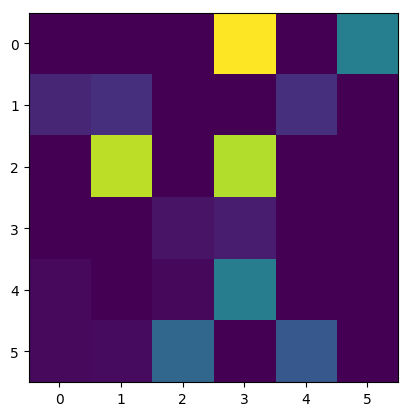

In [21]:
plt.imshow(X1[0].reshape(6,6))


GBM
GBM
GBM
GBM
GBM
OV
OV
OV
OV
OV


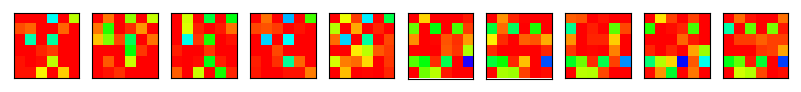

In [22]:
import numpy as np
_min, _max = np.amin(X1), np.amax(X1)
n = 10  # how many cases we will display
plt.figure(figsize=(10, 8))
for i in range(n):
    print(y1[i])

    ax = plt.subplot(1, n, i + 1)
    plt.imshow(X1[i].reshape(6, 6), cmap=plt.cm.hsv, vmin = _min, vmax = _max)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)


plt.show()

In [0]:
def plot_n_of(tumor_type,n=10):
  print('Tumor type:', tumor_type)
  plt.figure(figsize=(12, 8))
  count=0
  for i in range(X1.shape[0]):
       if y1[i]==tumor_type:
          ax = plt.subplot(1, n, count+1)
          plt.imshow(X1[i].reshape(6, 6), cmap=plt.cm.gray, vmin = _min, vmax = _max)
          ax.get_xaxis().set_visible(False)
          ax.get_yaxis().set_visible(False)
          count+=1
       if count==n-1:
          break
  plt.show()

          

('Tumor type:', 'GBM')


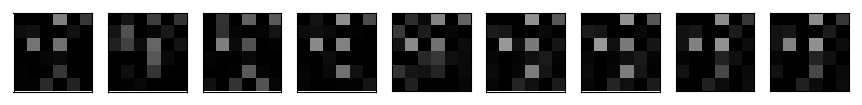

In [24]:
plot_n_of('GBM')

('Tumor type:', 'ACC')


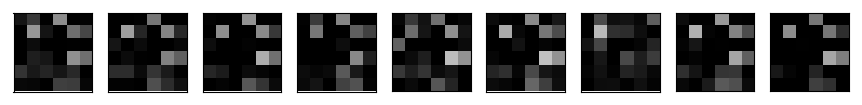

('Tumor type:', 'BLCA')


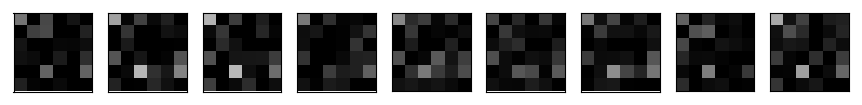

('Tumor type:', 'BRCA')


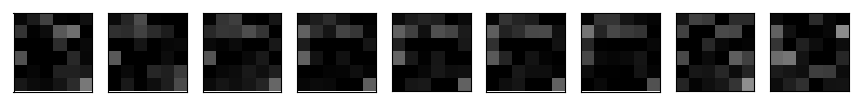

('Tumor type:', 'CESC')


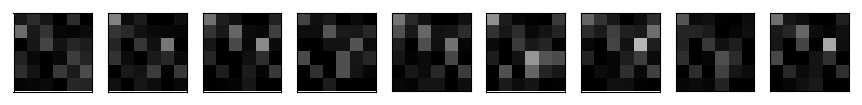

('Tumor type:', 'CHOL')


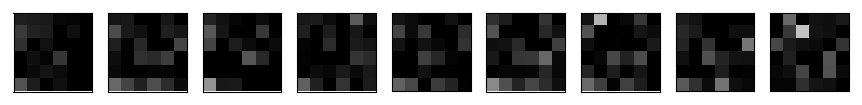

('Tumor type:', 'COAD')


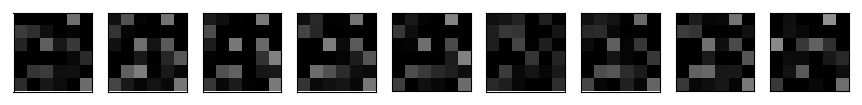

('Tumor type:', 'DLBC')


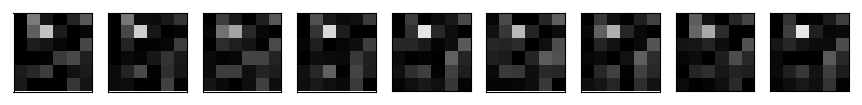

('Tumor type:', 'ESCA')


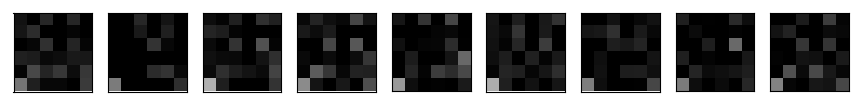

('Tumor type:', 'GBM')


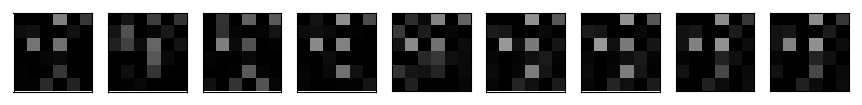

('Tumor type:', 'HNSC')


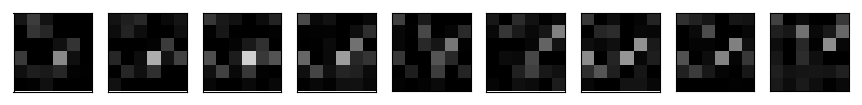

('Tumor type:', 'KICH')


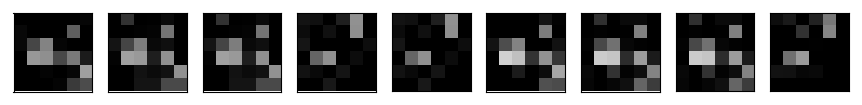

('Tumor type:', 'KIRC')


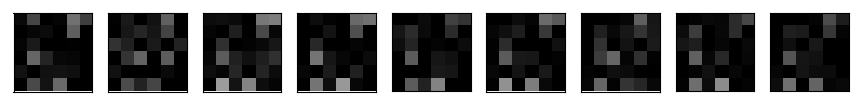

('Tumor type:', 'KIRP')


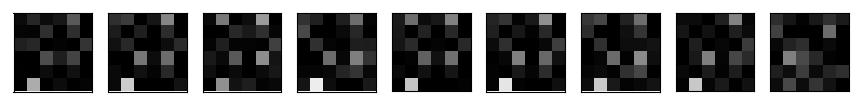

('Tumor type:', 'LAML')


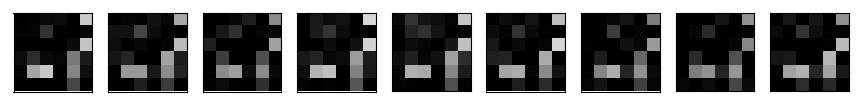

('Tumor type:', 'LGG')


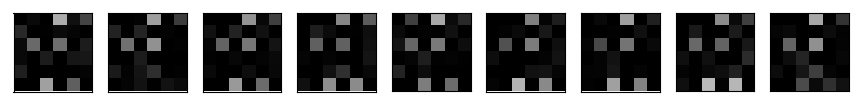

('Tumor type:', 'LIHC')


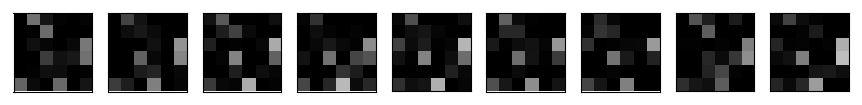

('Tumor type:', 'LUAD')


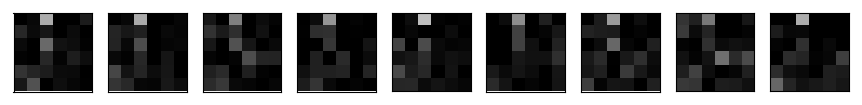

('Tumor type:', 'LUSC')


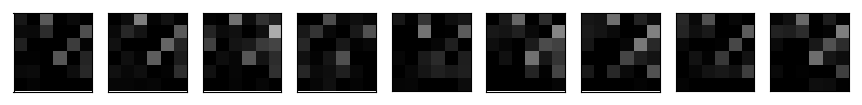

('Tumor type:', 'MESO')


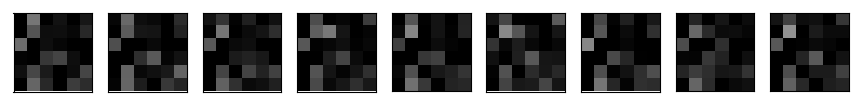

('Tumor type:', 'OV')


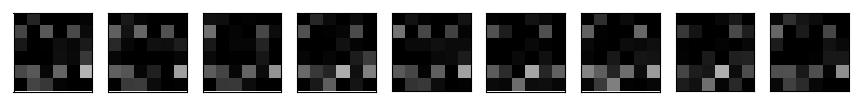

('Tumor type:', 'PAAD')


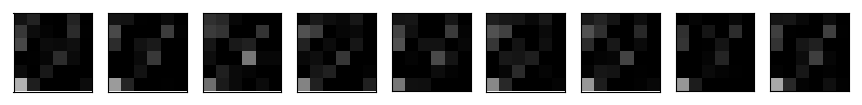

('Tumor type:', 'PCPG')


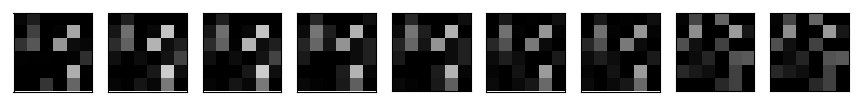

('Tumor type:', 'PRAD')


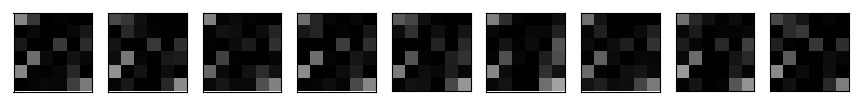

('Tumor type:', 'READ')


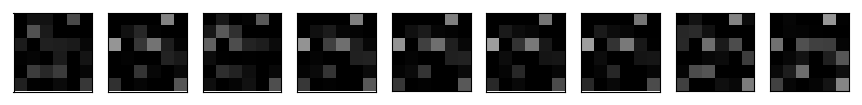

('Tumor type:', 'SARC')


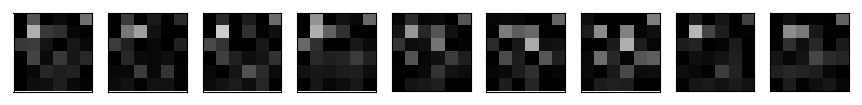

('Tumor type:', 'SKCM')


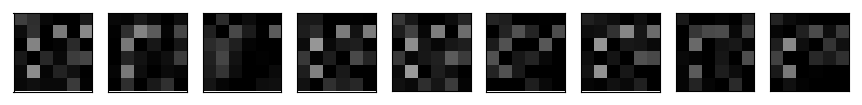

('Tumor type:', 'STAD')


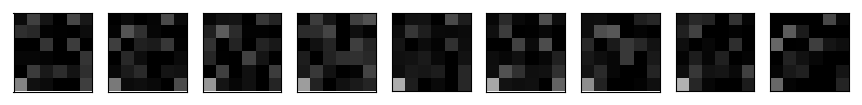

('Tumor type:', 'TGCT')


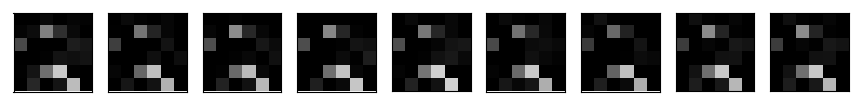

('Tumor type:', 'THCA')


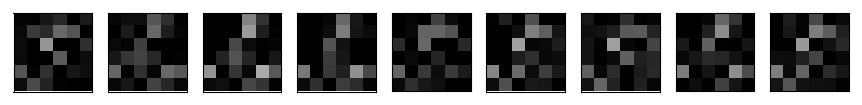

('Tumor type:', 'THYM')


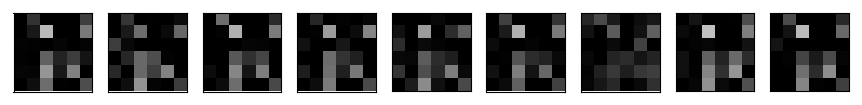

('Tumor type:', 'UCEC')


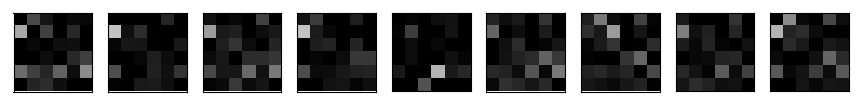

('Tumor type:', 'UCS')


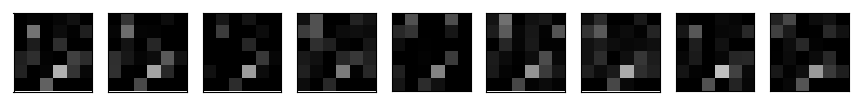

('Tumor type:', 'UVM')


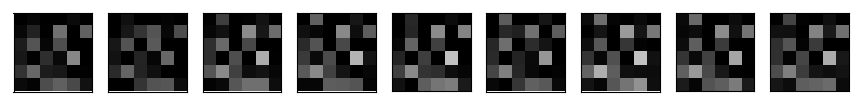

In [25]:
for tumor_type in tumor_types:
  plot_n_of(tumor_type)

## Subtype discovery from latent dimensions

In [26]:
gbm_indices = [i for i in range(y1.shape[0]) if y1[i]=='GBM']
gbm_indices

[0,
 1,
 2,
 3,
 4,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 187,
 188,
 189,
 190,
 191,
 192,
 193,
 194,
 195,
 196,
 197,
 198,
 199,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 225,
 226,
 227,
 228,
 229,
 230,
 231,
 232,
 233,
 234,
 235,
 236,
 237,
 238,
 460,
 461,
 462,
 463,
 464,
 465,
 466,
 467,
 468,
 469,
 470,
 471,
 472,
 473,
 474,
 475,
 476,
 477,
 478,
 479,
 480,
 481,
 482,
 483,
 484,
 485,
 486,
 487,
 488,
 489,
 490,
 491,
 492,
 493,
 494,
 745,
 746,
 747,
 748,
 749,
 750,
 751,
 752,
 753,
 754,
 960,
 961,
 9

In [0]:
gbms = X1[gbm_indices]

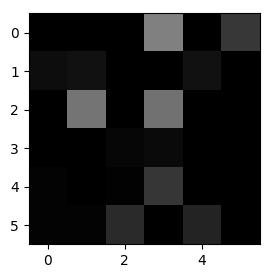

In [28]:
plt.figure(figsize=(3, 3))
plt.imshow(gbms[0].reshape(6, 6), cmap=plt.cm.gray, vmin = _min, vmax = _max)
plt.show()

In [0]:
def initialize_centroids(points, k):
    """returns k centroids from the initial points"""
    centroids = points.copy()
    np.random.shuffle(centroids)
    return centroids[:k]

In [30]:
initialize_centroids(gbms,3)

array([[0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.1829150e+00,
        0.0000000e+00, 2.5217915e+00, 0.0000000e+00, 2.5008202e-01,
        6.9820666e-01, 0.0000000e+00, 1.2293639e+00, 0.0000000e+00,
        5.6265604e-01, 8.6334670e+00, 1.3267636e-01, 9.8281840e+00,
        0.0000000e+00, 6.8712234e-03, 1.8014383e-01, 0.0000000e+00,
        0.0000000e+00, 3.6045074e-02, 4.1144562e-01, 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 4.8841340e+00,
        0.0000000e+00, 9.4018555e-01, 0.0000000e+00, 0.0000000e+00,
        3.8830795e+00, 0.0000000e+00, 1.1613913e+00, 1.9525350e-02],
       [0.0000000e+00, 3.4770894e+00, 7.5948120e-01, 9.9453470e+00,
        0.0000000e+00, 7.4445610e+00, 4.2125225e+00, 0.0000000e+00,
        2.1903288e+00, 0.0000000e+00, 4.5213032e-01, 0.0000000e+00,
        1.3574593e+00, 1.0334025e+01, 0.0000000e+00, 8.4975605e+00,
        0.0000000e+00, 9.1773890e-01, 0.0000000e+00, 0.0000000e+00,
        3.0006676e+00, 4.1247640e+00, 1.1712418

In [0]:
def closest_centroid(points, centroids):
    """returns an array containing the index to the nearest centroid for each point"""
    distances = np.sqrt(((points - centroids[:, np.newaxis])**2).sum(axis=2))
    return np.argmin(distances, axis=0)

In [32]:
C = initialize_centroids(gbms,3)
closest_centroid(gbms, C)

array([2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 0, 2, 0, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 1,
       1, 1, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 0, 0, 2, 1, 1, 2, 1, 2, 0, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 0, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2,
       1, 1, 1, 0, 0, 1, 1, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 2, 1, 2, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 2, 1, 2, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 2,
       1, 2, 0, 2, 1, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 2, 0, 0, 1, 0,
       0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0])

In [0]:
def move_centroids(points, closest, centroids):
    """returns the new centroids assigned from the points closest to them"""
    return np.array([points[closest==k].mean(axis=0) for k in range(centroids.shape[0])])

In [0]:
def distortion(mu, c, vec):
  return ((mu[c] - vec) ** 2).sum() / vec.shape[0]

In [35]:
C = initialize_centroids(gbms,8)
closest = closest_centroid(gbms, C)
print(distortion(C, closest, gbms))
C=move_centroids(gbms, closest, C)
print(distortion(C, closest, gbms))


40.427678740018806
27.278003984562563


In [36]:
closest = closest_centroid(gbms, C)
C=move_centroids(gbms, closest, C)
print(distortion(C, closest, gbms))

24.551842847640184


In [37]:
for _ in range(10):
  closest = closest_centroid(gbms, C)
  C=move_centroids(gbms, closest, C)
  print(distortion(C, closest, gbms))

23.311702766975507
22.726193230430436
22.489235293035723
22.38474009054123
22.178357830986002
21.93570291979442
21.794126971836363
21.58872777822122
21.52395222140855
21.518038708871835


Discovered Subtypes of GBM


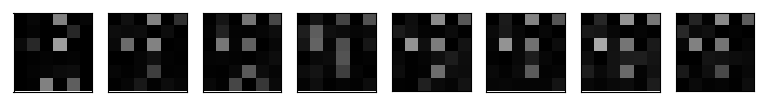

In [38]:
print('Discovered Subtypes of GBM')
plt.figure(figsize=(12, 8))
for i in range(C.shape[0]):
   ax = plt.subplot(1, n, i+1)
   plt.imshow(C[i].reshape(6, 6), cmap=plt.cm.gray, vmin = _min, vmax = _max)
   ax.get_xaxis().set_visible(False)
   ax.get_yaxis().set_visible(False)
plt.show()

# Finding subcluster across all tumors without class bias

In [0]:
C = initialize_centroids(X1,100)


In [56]:
C.shape

(100, 36)

In [57]:
for _ in range(40):
  closest = closest_centroid(X1, C)
  C=move_centroids(X1, closest, C)
  print(distortion(C, closest, X1))

65.4422312069496
52.3316697672986
48.14809773098662
46.72119243923233
45.95488887473632
45.42878245199348
45.12707079093236
44.95252211225609
44.7739257564095
44.60075208864487
44.4981948562755
44.430620132447814
44.38834898677338
44.32865234630627
44.23920684049431
44.176652970888924
44.127371452678624
44.09764001152036
44.06748667952085
44.03321962563041
44.008293420832466
43.98340405279559
43.95783540960666
43.938658585832464
43.917510457331666
43.89919321173883
43.886117097605776
43.874222551883406
43.86483385777137
43.85712954984436
43.84775141928494
43.83650184217236
43.827337781016595
43.82347349529221
43.8196070993392
43.817057146131006
43.815269372389324
43.81416283286153
43.813041594038914
43.81222252012306


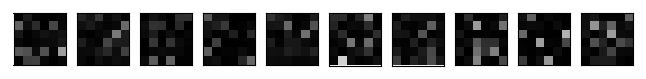

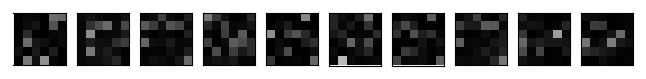

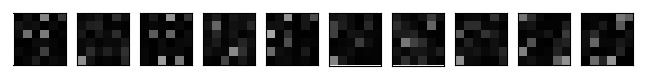

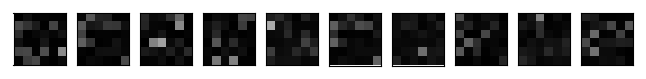

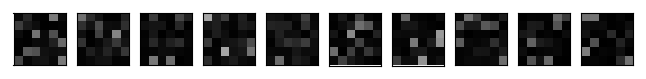

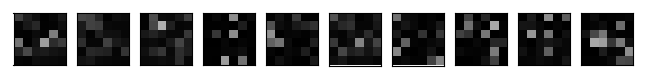

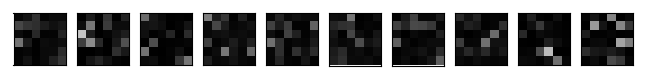

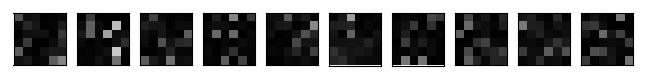

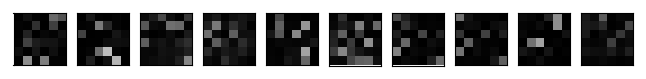

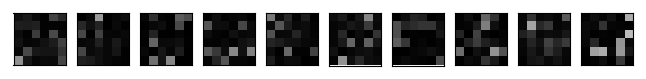

In [58]:
n=10
for j in range(10):
  #print('Discovered types across all tumors')
  plt.figure(figsize=(8, 6))
  for i in range(n):
     ax = plt.subplot(1, n, i+1)
     plt.imshow(C[j*n+i].reshape(6, 6), cmap=plt.cm.gray, vmin = _min, vmax = _max)
     ax.get_xaxis().set_visible(False)
     ax.get_yaxis().set_visible(False)
  plt.show()

## Since these are all around the place, it would be nice to sort them so that nearest vectors are nearest order!

In [0]:
ordered_C = C[np.lexsort(([C[:, i] for i in range(C.shape[1]-1, -1, -1)]))]

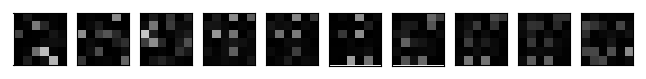

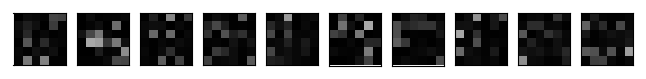

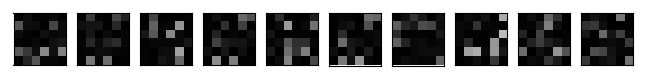

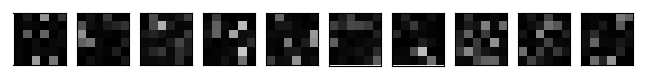

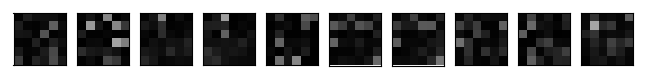

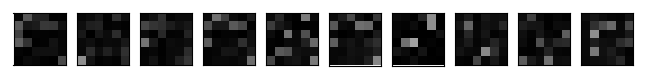

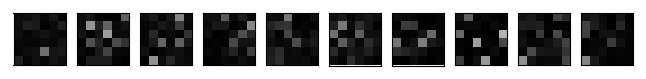

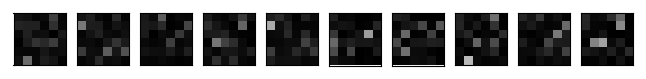

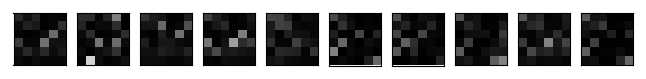

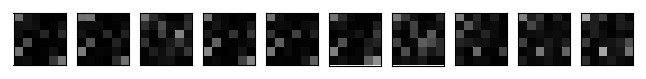

In [61]:
n=10
for j in range(10):
  #print('Discovered types across all tumors')
  plt.figure(figsize=(8, 6))
  for i in range(n):
     ax = plt.subplot(1, n, i+1)
     plt.imshow(ordered_C[j*n+i].reshape(6, 6), cmap=plt.cm.gray, vmin = _min, vmax = _max)
     ax.get_xaxis().set_visible(False)
     ax.get_yaxis().set_visible(False)
  plt.show()

## How many clusters are likely to be there?

In [0]:
from sklearn.cluster import KMeans

In [68]:
clusters_numbers = list(range(10,151,5))

model_scores = []

for n_clusters in clusters_numbers:
  print('Fitting a model with',n_clusters,'Clusters')
  model = KMeans(n_clusters=n_clusters)
  model.fit(X1)
  model_scores.append(model.inertia_)
  

('Fitting a model with', 10, 'Clusters')
('Fitting a model with', 15, 'Clusters')
('Fitting a model with', 20, 'Clusters')
('Fitting a model with', 25, 'Clusters')
('Fitting a model with', 30, 'Clusters')
('Fitting a model with', 35, 'Clusters')
('Fitting a model with', 40, 'Clusters')
('Fitting a model with', 45, 'Clusters')
('Fitting a model with', 50, 'Clusters')
('Fitting a model with', 55, 'Clusters')
('Fitting a model with', 60, 'Clusters')
('Fitting a model with', 65, 'Clusters')
('Fitting a model with', 70, 'Clusters')
('Fitting a model with', 75, 'Clusters')
('Fitting a model with', 80, 'Clusters')
('Fitting a model with', 85, 'Clusters')
('Fitting a model with', 90, 'Clusters')
('Fitting a model with', 95, 'Clusters')
('Fitting a model with', 100, 'Clusters')
('Fitting a model with', 105, 'Clusters')
('Fitting a model with', 110, 'Clusters')
('Fitting a model with', 115, 'Clusters')
('Fitting a model with', 120, 'Clusters')
('Fitting a model with', 125, 'Clusters')
('Fitting 

[[<matplotlib.axis.XTick at 0x7febd1da4a90>,

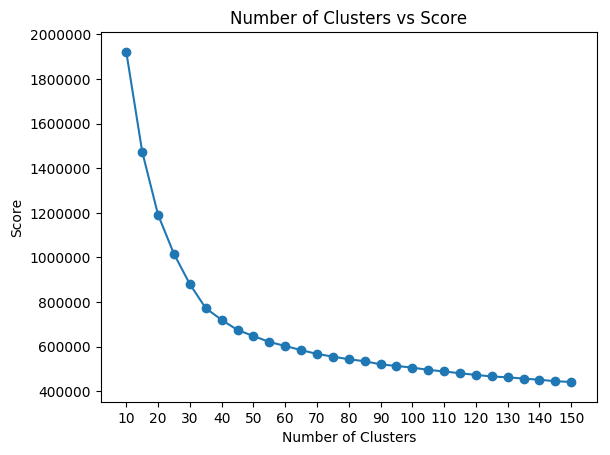

In [72]:
fig, ax = plt.subplots()
ax.plot(clusters_numbers, model_scores)
ax.scatter(clusters_numbers, model_scores)
ax.set(title='Number of Clusters vs Score',
       xlabel='Number of Clusters',
       ylabel='Score')
ax.xaxis.set(ticks=range(10,151,10))

## Let us do this cluster counting within each disease

('Clustering', 'ACC')
('Clustering', 'BLCA')
('Clustering', 'BRCA')
('Clustering', 'CESC')
('Clustering', 'CHOL')
('Clustering', 'COAD')
('Clustering', 'DLBC')
('Clustering', 'ESCA')
('Clustering', 'GBM')
('Clustering', 'HNSC')
('Clustering', 'KICH')
('Clustering', 'KIRC')
('Clustering', 'KIRP')
('Clustering', 'LAML')
('Clustering', 'LGG')
('Clustering', 'LIHC')
('Clustering', 'LUAD')
('Clustering', 'LUSC')
('Clustering', 'MESO')
('Clustering', 'OV')
('Clustering', 'PAAD')
('Clustering', 'PCPG')
('Clustering', 'PRAD')
('Clustering', 'READ')
('Clustering', 'SARC')
('Clustering', 'SKCM')
('Clustering', 'STAD')
('Clustering', 'TGCT')
('Clustering', 'THCA')
('Clustering', 'THYM')
('Clustering', 'UCEC')
('Clustering', 'UCS')
('Clustering', 'UVM')


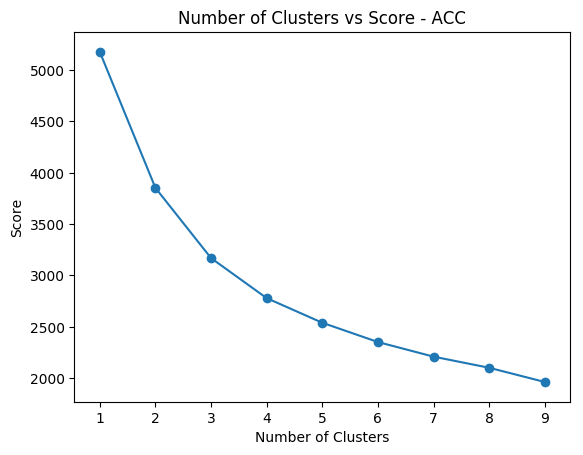

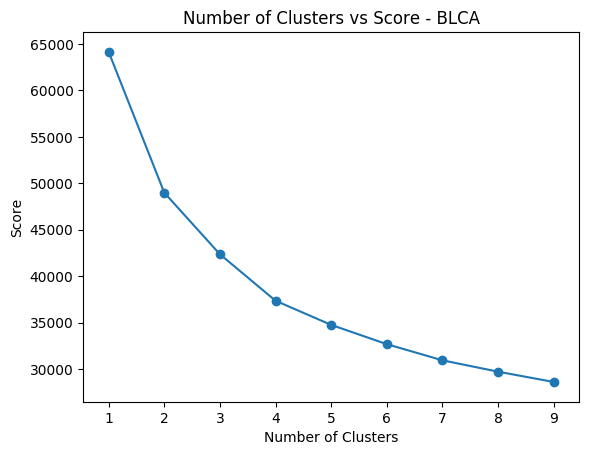

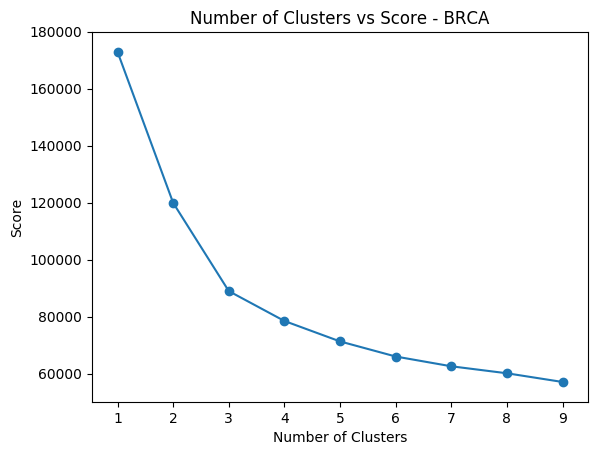

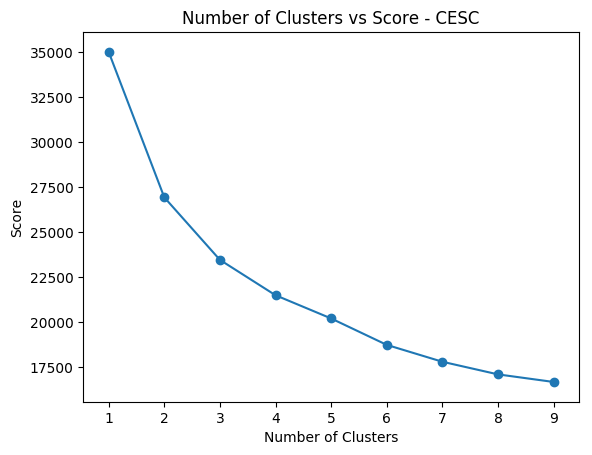

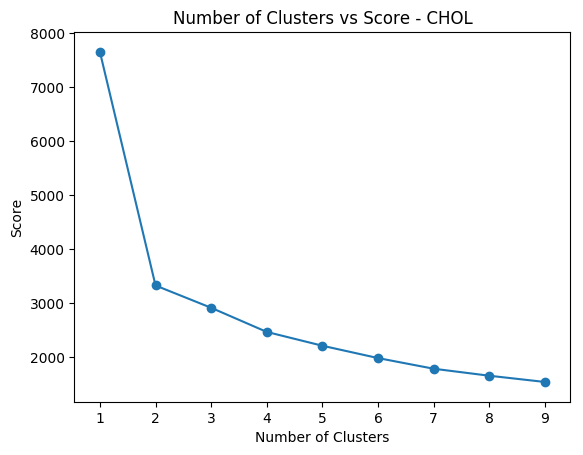

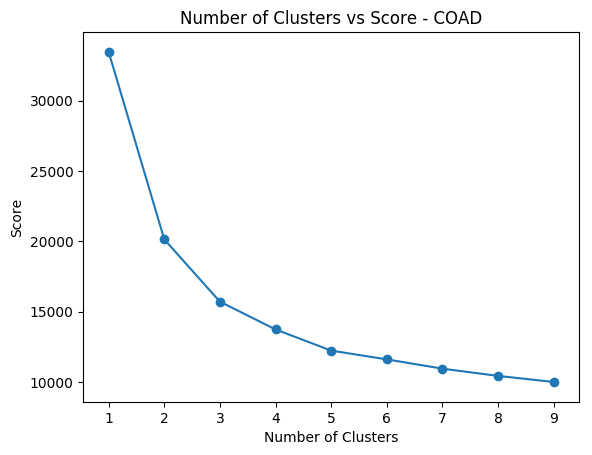

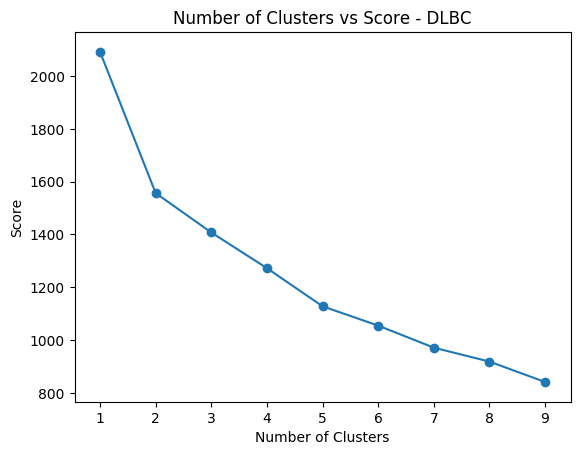

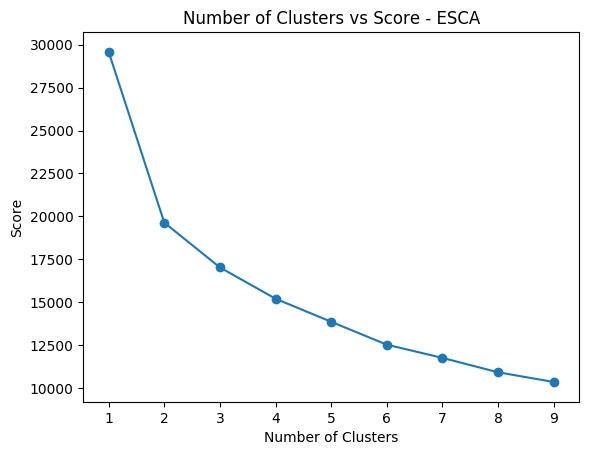

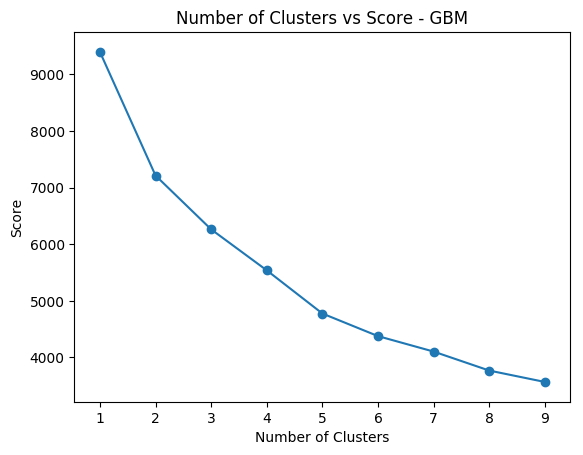

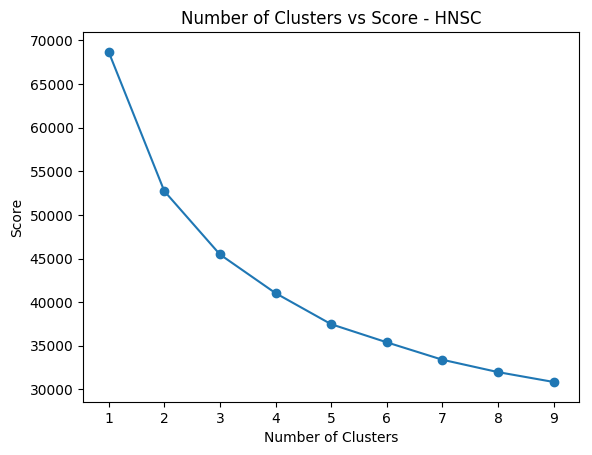

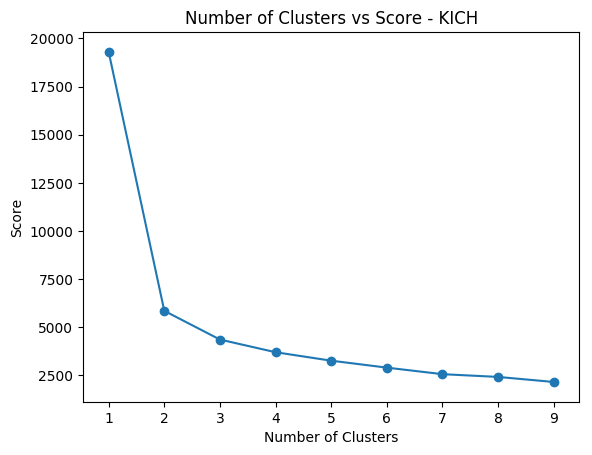

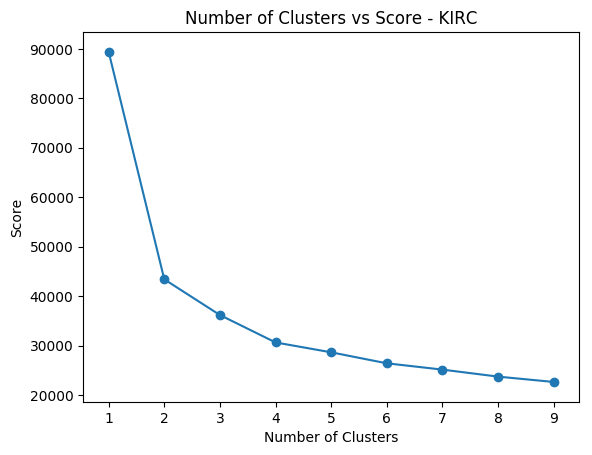

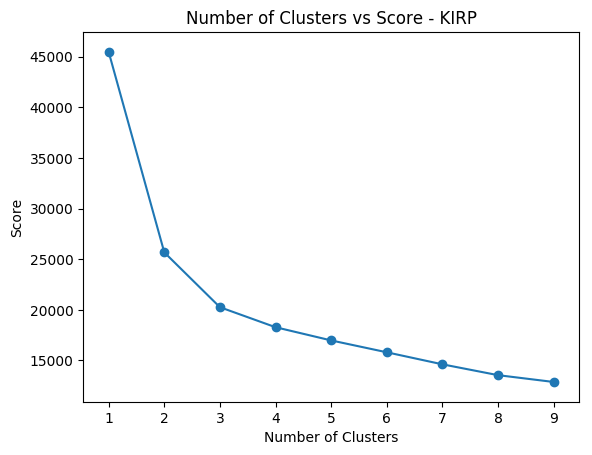

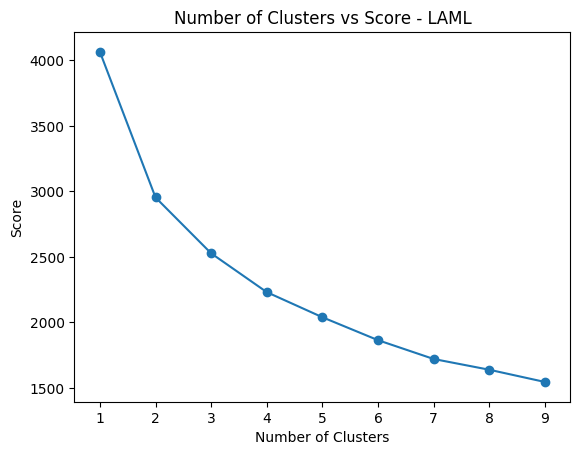

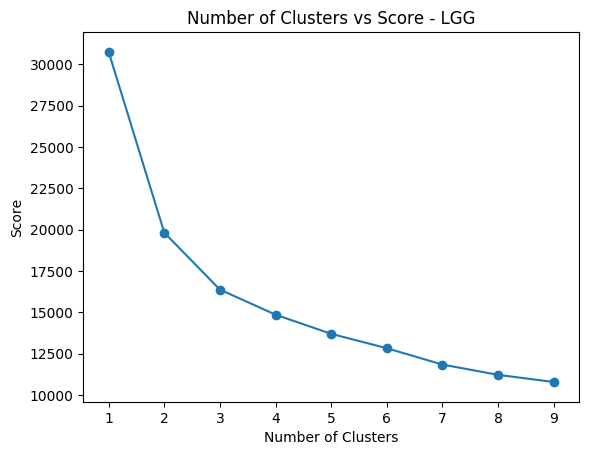

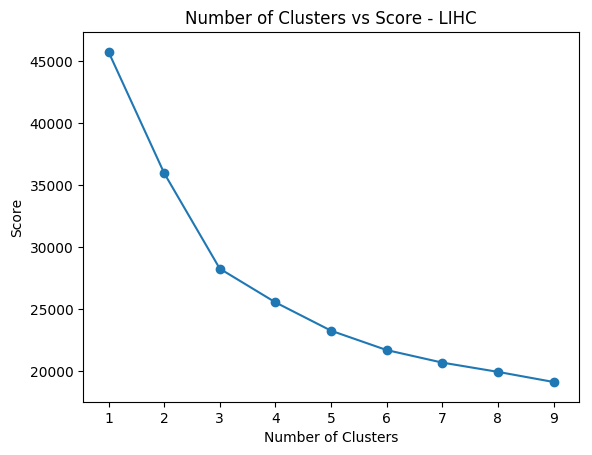

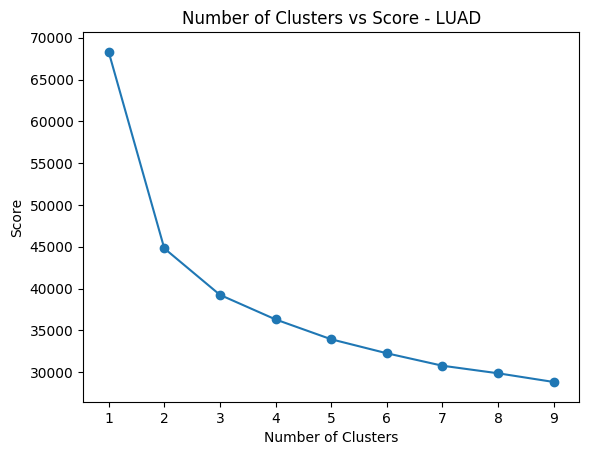

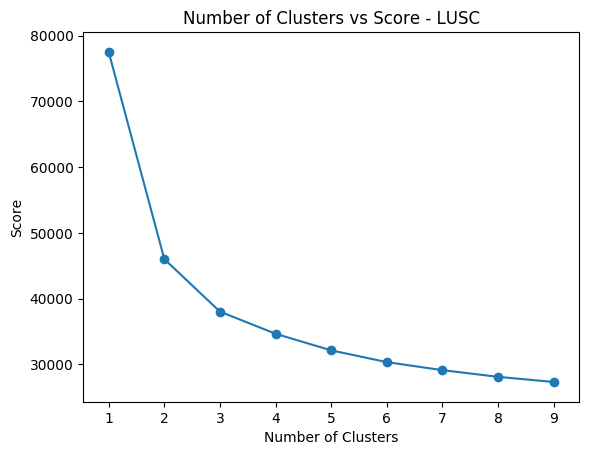

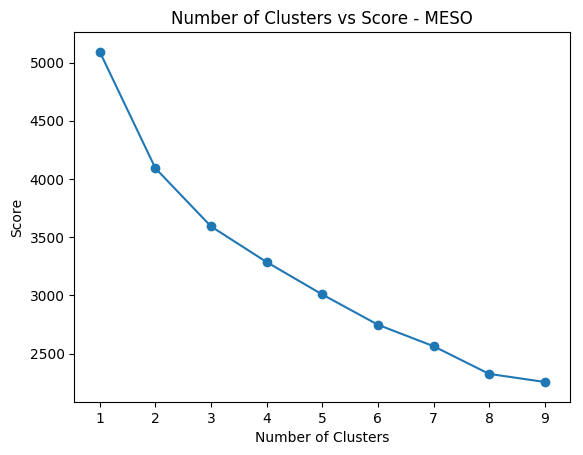

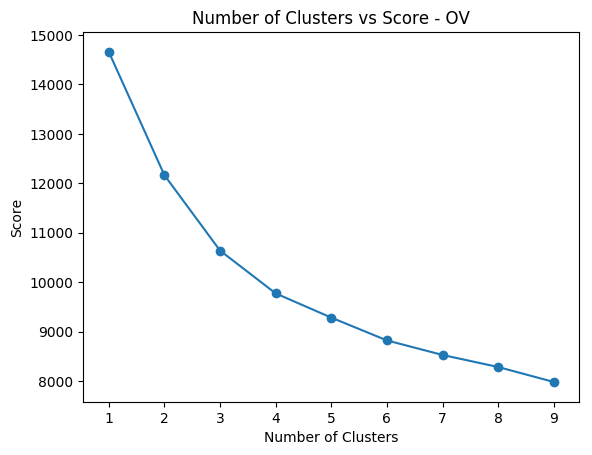

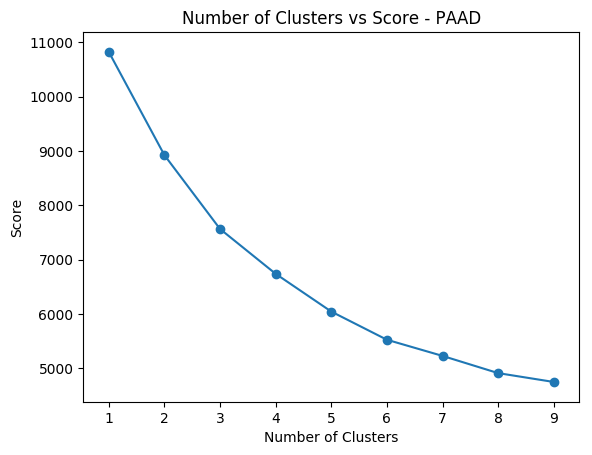

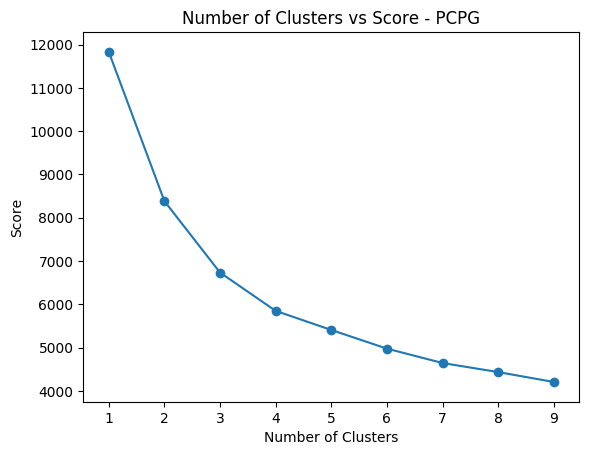

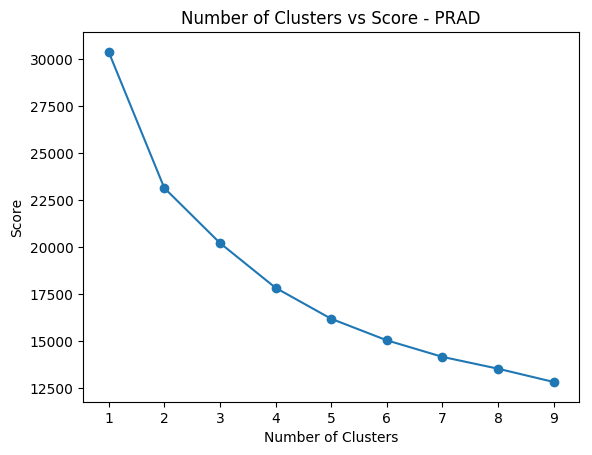

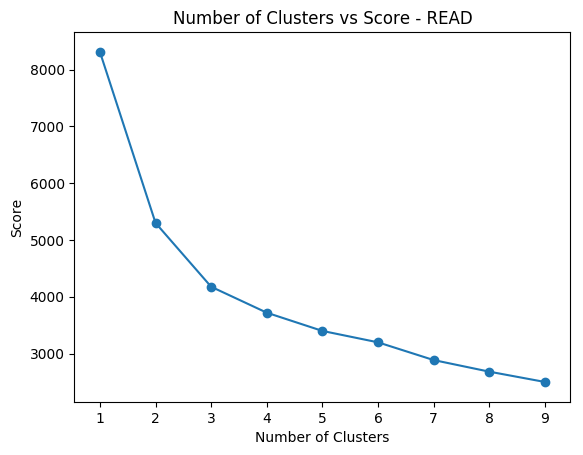

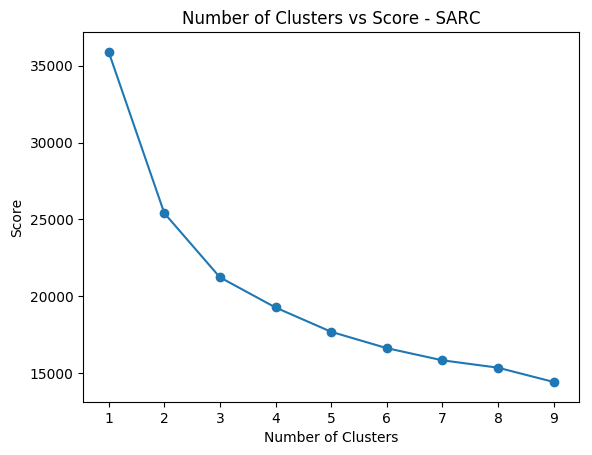

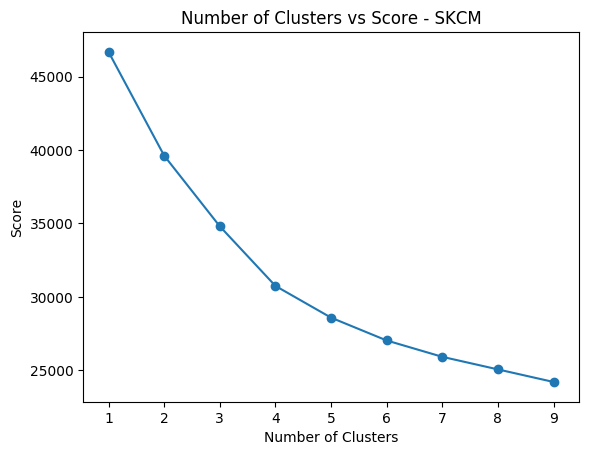

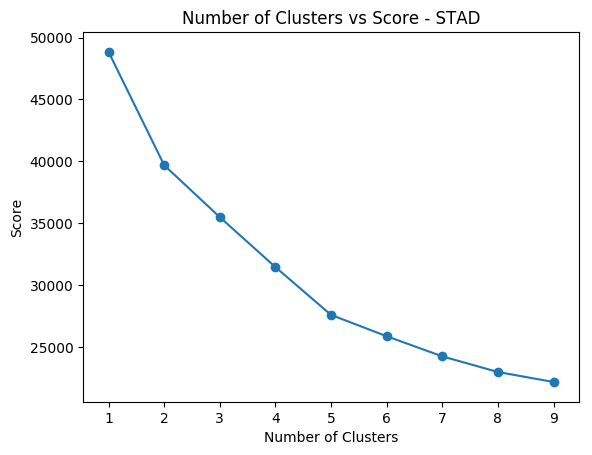

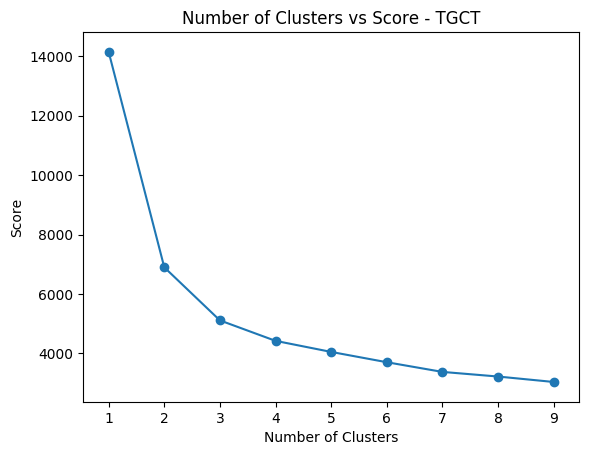

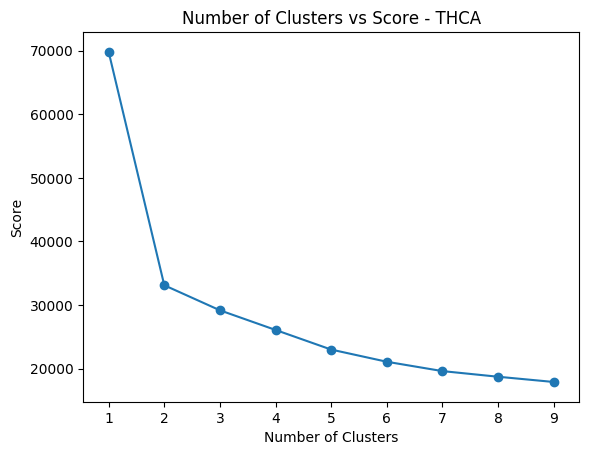

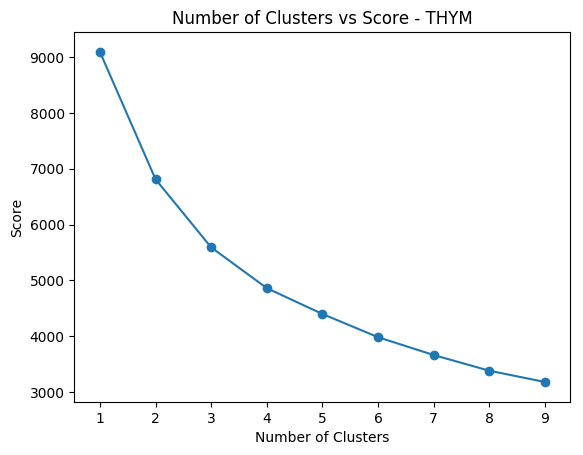

In [0]:
#tumor_type='PRAD'

for tumor_type in tumor_types:
  print('Clustering',tumor_type)
  tt_indices = [i for i in range(y1.shape[0]) if y1[i]==tumor_type]
  tt_tumors = X1[tt_indices]
  clusters_numbers = list(range(1,10))

  model_scores = []

  for n_clusters in clusters_numbers:
    #print('Fitting a model with',n_clusters,'Clusters in', tumor_type, 'data')
    model = KMeans(n_clusters=n_clusters)
    model.fit(tt_tumors)
    model_scores.append(model.inertia_)

  fig, ax = plt.subplots()
  ax.plot(clusters_numbers, model_scores)
  ax.scatter(clusters_numbers, model_scores)
  ax.set(title='Number of Clusters vs Score'+' - '+tumor_type,
         xlabel='Number of Clusters',
         ylabel='Score')
  ax.xaxis.set(ticks=range(1,10))
